In [1]:
import tensorflow as tf
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# alternative impementation of tf model
source : https://www.tensorflow.org/guide/core/logistic_regression_core

# load data

In [2]:
base_path = "/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/"
data_path = base_path + "/my_code/Bayesian-fairness/data"

In [3]:
features = ['age_cat', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree']
labels = ['two_year_recid']

In [4]:
dataset = pd.read_csv(data_path + "/compas.csv")
dataset = dataset.astype("float32")

In [5]:
train_dataset = dataset.iloc[0:6000]
test_dataset = dataset.iloc[6000:]

# preprosesing

In [6]:
# get feature/labels
x_train, y_train = train_dataset[features], train_dataset[labels]
x_test, y_test = test_dataset[features], test_dataset[labels]

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = x_train
x_test_norm = x_test

In [8]:
x_test_norm.shape

(1214, 6)

# test logistic regresion tf

In [13]:
import tensorflow as tf

class LogisticRegresionTF(tf.keras.Model):
    """
    logistic regresion model , tensorflow
    """
    def __init__(self, input_dim):
        super(LogisticRegresionTF, self).__init__()
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            initial_value=w_init(shape=(input_dim, 1), dtype="float32"),
            trainable=True,
        )
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(
            initial_value=b_init(shape=(), dtype="float32"),
            trainable=True
        )

    def call(self, inputs):
        return tf.nn.sigmoid(tf.matmul(inputs,self.w) + self.b)

In [28]:
policy = LogisticRegresionTF(input_dim=x_train_norm.shape[1])

In [29]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
policy.compile(optimizer=optimizer,
               loss = "BinaryCrossentropy",
               metrics = ["accuracy"])

In [30]:
x_train_norm.shape[0]//64

93

In [31]:
history = policy.fit(x_train_norm,
                     y_train,
                     validation_data=(x_test_norm, y_test),
                     epochs=200*10,
                     batch_size=x_train_norm.shape[0],
                     shuffle=True).history

Epoch 1/2000
1/1 [==============================] - 0s 185ms/step - loss: 0.7279 - accuracy: 0.3697 - val_loss: 0.7274 - val_accuracy: 0.3460
Epoch 2/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.7272 - accuracy: 0.3697 - val_loss: 0.7267 - val_accuracy: 0.3460
Epoch 3/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.7265 - accuracy: 0.3698 - val_loss: 0.7260 - val_accuracy: 0.3460
Epoch 4/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.7259 - accuracy: 0.3698 - val_loss: 0.7253 - val_accuracy: 0.3460
Epoch 5/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.7252 - accuracy: 0.3698 - val_loss: 0.7246 - val_accuracy: 0.3460
Epoch 6/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.7246 - accuracy: 0.3698 - val_loss: 0.7240 - val_accuracy: 0.3460
Epoch 7/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.7240 - accuracy: 0.3698 - val_loss: 0.7233 - val_accuracy: 0.3468
Epoch 8/2000

Epoch 59/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.7017 - accuracy: 0.3673 - val_loss: 0.7002 - val_accuracy: 0.3954
Epoch 60/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.7015 - accuracy: 0.3730 - val_loss: 0.6999 - val_accuracy: 0.3970
Epoch 61/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.7012 - accuracy: 0.3783 - val_loss: 0.6996 - val_accuracy: 0.4044
Epoch 62/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.7009 - accuracy: 0.3825 - val_loss: 0.6993 - val_accuracy: 0.4102
Epoch 63/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.7007 - accuracy: 0.3875 - val_loss: 0.6991 - val_accuracy: 0.4152
Epoch 64/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.7004 - accuracy: 0.3917 - val_loss: 0.6988 - val_accuracy: 0.4168
Epoch 65/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.7002 - accuracy: 0.3973 - val_loss: 0.6985 - val_accuracy: 0.4308
Epoch 

1/1 [==============================] - 0s 10ms/step - loss: 0.6911 - accuracy: 0.4472 - val_loss: 0.6891 - val_accuracy: 0.4638
Epoch 117/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6910 - accuracy: 0.4472 - val_loss: 0.6889 - val_accuracy: 0.4638
Epoch 118/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6909 - accuracy: 0.4472 - val_loss: 0.6888 - val_accuracy: 0.4646
Epoch 119/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6908 - accuracy: 0.4472 - val_loss: 0.6887 - val_accuracy: 0.4638
Epoch 120/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6907 - accuracy: 0.4472 - val_loss: 0.6886 - val_accuracy: 0.4638
Epoch 121/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6905 - accuracy: 0.4473 - val_loss: 0.6884 - val_accuracy: 0.4638
Epoch 122/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6904 - accuracy: 0.4478 - val_loss: 0.6883 - val_accuracy: 0.4638
Epoch 123/2000

1/1 [==============================] - 0s 10ms/step - loss: 0.6858 - accuracy: 0.4582 - val_loss: 0.6836 - val_accuracy: 0.4728
Epoch 174/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6858 - accuracy: 0.4582 - val_loss: 0.6835 - val_accuracy: 0.4728
Epoch 175/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6857 - accuracy: 0.4582 - val_loss: 0.6834 - val_accuracy: 0.4728
Epoch 176/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6856 - accuracy: 0.4582 - val_loss: 0.6833 - val_accuracy: 0.4728
Epoch 177/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6856 - accuracy: 0.4582 - val_loss: 0.6833 - val_accuracy: 0.4728
Epoch 178/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6855 - accuracy: 0.4582 - val_loss: 0.6832 - val_accuracy: 0.4728
Epoch 179/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6854 - accuracy: 0.4582 - val_loss: 0.6831 - val_accuracy: 0.4728
Epoch 180/2000


1/1 [==============================] - 0s 10ms/step - loss: 0.6825 - accuracy: 0.4613 - val_loss: 0.6801 - val_accuracy: 0.4753
Epoch 231/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6824 - accuracy: 0.4613 - val_loss: 0.6801 - val_accuracy: 0.4753
Epoch 232/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6824 - accuracy: 0.4613 - val_loss: 0.6800 - val_accuracy: 0.4753
Epoch 233/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6823 - accuracy: 0.4613 - val_loss: 0.6800 - val_accuracy: 0.4753
Epoch 234/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6823 - accuracy: 0.4613 - val_loss: 0.6799 - val_accuracy: 0.4753
Epoch 235/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6822 - accuracy: 0.4613 - val_loss: 0.6799 - val_accuracy: 0.4753
Epoch 236/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6822 - accuracy: 0.4613 - val_loss: 0.6798 - val_accuracy: 0.4753
Epoch 237/2000

1/1 [==============================] - 0s 11ms/step - loss: 0.6798 - accuracy: 0.5318 - val_loss: 0.6775 - val_accuracy: 0.5445
Epoch 288/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6798 - accuracy: 0.5318 - val_loss: 0.6774 - val_accuracy: 0.5445
Epoch 289/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6797 - accuracy: 0.5318 - val_loss: 0.6774 - val_accuracy: 0.5445
Epoch 290/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6797 - accuracy: 0.5318 - val_loss: 0.6774 - val_accuracy: 0.5445
Epoch 291/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6796 - accuracy: 0.5318 - val_loss: 0.6773 - val_accuracy: 0.5708
Epoch 292/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6796 - accuracy: 0.5568 - val_loss: 0.6773 - val_accuracy: 0.5708
Epoch 293/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6796 - accuracy: 0.5568 - val_loss: 0.6772 - val_accuracy: 0.5708
Epoch 294/2000

1/1 [==============================] - 0s 10ms/step - loss: 0.6775 - accuracy: 0.5715 - val_loss: 0.6753 - val_accuracy: 0.5914
Epoch 345/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6775 - accuracy: 0.5715 - val_loss: 0.6752 - val_accuracy: 0.5914
Epoch 346/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6774 - accuracy: 0.5715 - val_loss: 0.6752 - val_accuracy: 0.5914
Epoch 347/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6774 - accuracy: 0.5715 - val_loss: 0.6751 - val_accuracy: 0.5898
Epoch 348/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6774 - accuracy: 0.5703 - val_loss: 0.6751 - val_accuracy: 0.5898
Epoch 349/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6773 - accuracy: 0.5703 - val_loss: 0.6751 - val_accuracy: 0.5898
Epoch 350/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6773 - accuracy: 0.5703 - val_loss: 0.6750 - val_accuracy: 0.5898
Epoch 351/2000


1/1 [==============================] - 0s 10ms/step - loss: 0.6754 - accuracy: 0.5707 - val_loss: 0.6732 - val_accuracy: 0.5890
Epoch 402/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6754 - accuracy: 0.5707 - val_loss: 0.6732 - val_accuracy: 0.5890
Epoch 403/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6753 - accuracy: 0.5707 - val_loss: 0.6732 - val_accuracy: 0.5890
Epoch 404/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6753 - accuracy: 0.5707 - val_loss: 0.6731 - val_accuracy: 0.5890
Epoch 405/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6753 - accuracy: 0.5707 - val_loss: 0.6731 - val_accuracy: 0.5890
Epoch 406/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6752 - accuracy: 0.5707 - val_loss: 0.6731 - val_accuracy: 0.5890
Epoch 407/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6752 - accuracy: 0.5707 - val_loss: 0.6730 - val_accuracy: 0.5890
Epoch 408/2000

1/1 [==============================] - 0s 10ms/step - loss: 0.6734 - accuracy: 0.5948 - val_loss: 0.6714 - val_accuracy: 0.6104
Epoch 459/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6734 - accuracy: 0.5948 - val_loss: 0.6713 - val_accuracy: 0.6104
Epoch 460/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6734 - accuracy: 0.5948 - val_loss: 0.6713 - val_accuracy: 0.6104
Epoch 461/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6733 - accuracy: 0.5948 - val_loss: 0.6713 - val_accuracy: 0.6104
Epoch 462/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6733 - accuracy: 0.5948 - val_loss: 0.6712 - val_accuracy: 0.6104
Epoch 463/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6733 - accuracy: 0.5948 - val_loss: 0.6712 - val_accuracy: 0.6104
Epoch 464/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6732 - accuracy: 0.5948 - val_loss: 0.6712 - val_accuracy: 0.6104
Epoch 465/2000
1

1/1 [==============================] - 0s 11ms/step - loss: 0.6715 - accuracy: 0.6268 - val_loss: 0.6696 - val_accuracy: 0.6540
Epoch 516/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6715 - accuracy: 0.6268 - val_loss: 0.6696 - val_accuracy: 0.6540
Epoch 517/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6715 - accuracy: 0.6268 - val_loss: 0.6695 - val_accuracy: 0.6540
Epoch 518/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6714 - accuracy: 0.6268 - val_loss: 0.6695 - val_accuracy: 0.6540
Epoch 519/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6714 - accuracy: 0.6268 - val_loss: 0.6695 - val_accuracy: 0.6540
Epoch 520/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6714 - accuracy: 0.6268 - val_loss: 0.6694 - val_accuracy: 0.6549
Epoch 521/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6713 - accuracy: 0.6270 - val_loss: 0.6694 - val_accuracy: 0.6549
Epoch 522/2000

1/1 [==============================] - 0s 11ms/step - loss: 0.6697 - accuracy: 0.6270 - val_loss: 0.6679 - val_accuracy: 0.6557
Epoch 573/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6697 - accuracy: 0.6270 - val_loss: 0.6679 - val_accuracy: 0.6557
Epoch 574/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6697 - accuracy: 0.6270 - val_loss: 0.6679 - val_accuracy: 0.6557
Epoch 575/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6696 - accuracy: 0.6270 - val_loss: 0.6678 - val_accuracy: 0.6557
Epoch 576/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6696 - accuracy: 0.6270 - val_loss: 0.6678 - val_accuracy: 0.6557
Epoch 577/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6696 - accuracy: 0.6270 - val_loss: 0.6678 - val_accuracy: 0.6557
Epoch 578/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6695 - accuracy: 0.6270 - val_loss: 0.6677 - val_accuracy: 0.6557
Epoch 579/2000

1/1 [==============================] - 0s 10ms/step - loss: 0.6680 - accuracy: 0.6340 - val_loss: 0.6663 - val_accuracy: 0.6614
Epoch 630/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6680 - accuracy: 0.6340 - val_loss: 0.6663 - val_accuracy: 0.6614
Epoch 631/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6679 - accuracy: 0.6340 - val_loss: 0.6663 - val_accuracy: 0.6614
Epoch 632/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6679 - accuracy: 0.6340 - val_loss: 0.6662 - val_accuracy: 0.6614
Epoch 633/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6679 - accuracy: 0.6340 - val_loss: 0.6662 - val_accuracy: 0.6614
Epoch 634/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6678 - accuracy: 0.6340 - val_loss: 0.6662 - val_accuracy: 0.6614
Epoch 635/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6678 - accuracy: 0.6340 - val_loss: 0.6661 - val_accuracy: 0.6614
Epoch 636/2000

1/1 [==============================] - 0s 10ms/step - loss: 0.6663 - accuracy: 0.6363 - val_loss: 0.6648 - val_accuracy: 0.6705
Epoch 687/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6663 - accuracy: 0.6363 - val_loss: 0.6648 - val_accuracy: 0.6705
Epoch 688/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6663 - accuracy: 0.6363 - val_loss: 0.6647 - val_accuracy: 0.6705
Epoch 689/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6663 - accuracy: 0.6363 - val_loss: 0.6647 - val_accuracy: 0.6705
Epoch 690/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6662 - accuracy: 0.6363 - val_loss: 0.6647 - val_accuracy: 0.6705
Epoch 691/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6662 - accuracy: 0.6380 - val_loss: 0.6647 - val_accuracy: 0.6705
Epoch 692/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6662 - accuracy: 0.6380 - val_loss: 0.6646 - val_accuracy: 0.6705
Epoch 693/2000

1/1 [==============================] - 0s 10ms/step - loss: 0.6647 - accuracy: 0.6380 - val_loss: 0.6633 - val_accuracy: 0.6705
Epoch 744/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6647 - accuracy: 0.6380 - val_loss: 0.6633 - val_accuracy: 0.6705
Epoch 745/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6647 - accuracy: 0.6380 - val_loss: 0.6633 - val_accuracy: 0.6705
Epoch 746/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6647 - accuracy: 0.6380 - val_loss: 0.6632 - val_accuracy: 0.6705
Epoch 747/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6646 - accuracy: 0.6380 - val_loss: 0.6632 - val_accuracy: 0.6705
Epoch 748/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6646 - accuracy: 0.6380 - val_loss: 0.6632 - val_accuracy: 0.6705
Epoch 749/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6646 - accuracy: 0.6380 - val_loss: 0.6632 - val_accuracy: 0.6705
Epoch 750/2000

1/1 [==============================] - 0s 11ms/step - loss: 0.6632 - accuracy: 0.6472 - val_loss: 0.6619 - val_accuracy: 0.6614
Epoch 801/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6632 - accuracy: 0.6472 - val_loss: 0.6619 - val_accuracy: 0.6614
Epoch 802/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6632 - accuracy: 0.6472 - val_loss: 0.6619 - val_accuracy: 0.6614
Epoch 803/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6631 - accuracy: 0.6472 - val_loss: 0.6618 - val_accuracy: 0.6614
Epoch 804/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6631 - accuracy: 0.6472 - val_loss: 0.6618 - val_accuracy: 0.6614
Epoch 805/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6631 - accuracy: 0.6472 - val_loss: 0.6618 - val_accuracy: 0.6614
Epoch 806/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6631 - accuracy: 0.6472 - val_loss: 0.6618 - val_accuracy: 0.6614
Epoch 807/2000

1/1 [==============================] - 0s 11ms/step - loss: 0.6618 - accuracy: 0.6518 - val_loss: 0.6606 - val_accuracy: 0.6631
Epoch 858/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6617 - accuracy: 0.6518 - val_loss: 0.6606 - val_accuracy: 0.6631
Epoch 859/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6617 - accuracy: 0.6518 - val_loss: 0.6605 - val_accuracy: 0.6631
Epoch 860/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6617 - accuracy: 0.6518 - val_loss: 0.6605 - val_accuracy: 0.6631
Epoch 861/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6617 - accuracy: 0.6518 - val_loss: 0.6605 - val_accuracy: 0.6631
Epoch 862/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6616 - accuracy: 0.6518 - val_loss: 0.6605 - val_accuracy: 0.6631
Epoch 863/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6616 - accuracy: 0.6518 - val_loss: 0.6604 - val_accuracy: 0.6631
Epoch 864/2000

1/1 [==============================] - 0s 11ms/step - loss: 0.6604 - accuracy: 0.6620 - val_loss: 0.6593 - val_accuracy: 0.6705
Epoch 915/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6603 - accuracy: 0.6620 - val_loss: 0.6593 - val_accuracy: 0.6705
Epoch 916/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6603 - accuracy: 0.6620 - val_loss: 0.6593 - val_accuracy: 0.6705
Epoch 917/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6603 - accuracy: 0.6620 - val_loss: 0.6592 - val_accuracy: 0.6705
Epoch 918/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6603 - accuracy: 0.6620 - val_loss: 0.6592 - val_accuracy: 0.6705
Epoch 919/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6602 - accuracy: 0.6620 - val_loss: 0.6592 - val_accuracy: 0.6705
Epoch 920/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6602 - accuracy: 0.6620 - val_loss: 0.6592 - val_accuracy: 0.6705
Epoch 921/2000

1/1 [==============================] - 0s 11ms/step - loss: 0.6590 - accuracy: 0.6608 - val_loss: 0.6581 - val_accuracy: 0.6779
Epoch 972/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6590 - accuracy: 0.6608 - val_loss: 0.6580 - val_accuracy: 0.6779
Epoch 973/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6590 - accuracy: 0.6608 - val_loss: 0.6580 - val_accuracy: 0.6779
Epoch 974/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6590 - accuracy: 0.6608 - val_loss: 0.6580 - val_accuracy: 0.6779
Epoch 975/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6589 - accuracy: 0.6608 - val_loss: 0.6580 - val_accuracy: 0.6779
Epoch 976/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6589 - accuracy: 0.6608 - val_loss: 0.6580 - val_accuracy: 0.6779
Epoch 977/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6589 - accuracy: 0.6608 - val_loss: 0.6579 - val_accuracy: 0.6779
Epoch 978/2000

1/1 [==============================] - 0s 10ms/step - loss: 0.6577 - accuracy: 0.6607 - val_loss: 0.6569 - val_accuracy: 0.6779
Epoch 1029/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6577 - accuracy: 0.6607 - val_loss: 0.6569 - val_accuracy: 0.6779
Epoch 1030/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6577 - accuracy: 0.6607 - val_loss: 0.6568 - val_accuracy: 0.6779
Epoch 1031/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6577 - accuracy: 0.6607 - val_loss: 0.6568 - val_accuracy: 0.6779
Epoch 1032/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6576 - accuracy: 0.6607 - val_loss: 0.6568 - val_accuracy: 0.6779
Epoch 1033/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6576 - accuracy: 0.6607 - val_loss: 0.6568 - val_accuracy: 0.6779
Epoch 1034/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6576 - accuracy: 0.6607 - val_loss: 0.6568 - val_accuracy: 0.6779
Epoch 10

1/1 [==============================] - 0s 10ms/step - loss: 0.6565 - accuracy: 0.6610 - val_loss: 0.6558 - val_accuracy: 0.6771
Epoch 1086/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6565 - accuracy: 0.6610 - val_loss: 0.6557 - val_accuracy: 0.6771
Epoch 1087/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6565 - accuracy: 0.6610 - val_loss: 0.6557 - val_accuracy: 0.6771
Epoch 1088/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6564 - accuracy: 0.6610 - val_loss: 0.6557 - val_accuracy: 0.6771
Epoch 1089/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6564 - accuracy: 0.6610 - val_loss: 0.6557 - val_accuracy: 0.6771
Epoch 1090/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6564 - accuracy: 0.6610 - val_loss: 0.6557 - val_accuracy: 0.6771
Epoch 1091/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6564 - accuracy: 0.6610 - val_loss: 0.6556 - val_accuracy: 0.6771
Epoch 10

1/1 [==============================] - 0s 11ms/step - loss: 0.6553 - accuracy: 0.6648 - val_loss: 0.6547 - val_accuracy: 0.6779
Epoch 1143/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6553 - accuracy: 0.6648 - val_loss: 0.6547 - val_accuracy: 0.6779
Epoch 1144/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6553 - accuracy: 0.6648 - val_loss: 0.6546 - val_accuracy: 0.6779
Epoch 1145/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6552 - accuracy: 0.6648 - val_loss: 0.6546 - val_accuracy: 0.6779
Epoch 1146/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6552 - accuracy: 0.6648 - val_loss: 0.6546 - val_accuracy: 0.6779
Epoch 1147/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6552 - accuracy: 0.6648 - val_loss: 0.6546 - val_accuracy: 0.6779
Epoch 1148/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6552 - accuracy: 0.6648 - val_loss: 0.6546 - val_accuracy: 0.6779
Epoch 114

1/1 [==============================] - 0s 11ms/step - loss: 0.6542 - accuracy: 0.6645 - val_loss: 0.6536 - val_accuracy: 0.6779
Epoch 1200/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6541 - accuracy: 0.6645 - val_loss: 0.6536 - val_accuracy: 0.6779
Epoch 1201/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6541 - accuracy: 0.6645 - val_loss: 0.6536 - val_accuracy: 0.6779
Epoch 1202/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6541 - accuracy: 0.6645 - val_loss: 0.6536 - val_accuracy: 0.6779
Epoch 1203/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6541 - accuracy: 0.6645 - val_loss: 0.6536 - val_accuracy: 0.6779
Epoch 1204/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6541 - accuracy: 0.6645 - val_loss: 0.6535 - val_accuracy: 0.6779
Epoch 1205/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6540 - accuracy: 0.6645 - val_loss: 0.6535 - val_accuracy: 0.6779
Epoch 120

1/1 [==============================] - 0s 11ms/step - loss: 0.6531 - accuracy: 0.6655 - val_loss: 0.6526 - val_accuracy: 0.6779
Epoch 1257/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6530 - accuracy: 0.6655 - val_loss: 0.6526 - val_accuracy: 0.6779
Epoch 1258/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6530 - accuracy: 0.6655 - val_loss: 0.6526 - val_accuracy: 0.6779
Epoch 1259/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6530 - accuracy: 0.6655 - val_loss: 0.6526 - val_accuracy: 0.6779
Epoch 1260/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6530 - accuracy: 0.6655 - val_loss: 0.6526 - val_accuracy: 0.6779
Epoch 1261/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6530 - accuracy: 0.6655 - val_loss: 0.6525 - val_accuracy: 0.6779
Epoch 1262/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6530 - accuracy: 0.6655 - val_loss: 0.6525 - val_accuracy: 0.6779
Epoch 126

1/1 [==============================] - 0s 11ms/step - loss: 0.6520 - accuracy: 0.6652 - val_loss: 0.6517 - val_accuracy: 0.6689
Epoch 1314/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6520 - accuracy: 0.6652 - val_loss: 0.6517 - val_accuracy: 0.6689
Epoch 1315/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6520 - accuracy: 0.6652 - val_loss: 0.6516 - val_accuracy: 0.6689
Epoch 1316/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6520 - accuracy: 0.6652 - val_loss: 0.6516 - val_accuracy: 0.6689
Epoch 1317/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6519 - accuracy: 0.6652 - val_loss: 0.6516 - val_accuracy: 0.6689
Epoch 1318/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6519 - accuracy: 0.6652 - val_loss: 0.6516 - val_accuracy: 0.6689
Epoch 1319/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6519 - accuracy: 0.6652 - val_loss: 0.6516 - val_accuracy: 0.6689
Epoch 13

1/1 [==============================] - 0s 10ms/step - loss: 0.6510 - accuracy: 0.6652 - val_loss: 0.6508 - val_accuracy: 0.6697
Epoch 1371/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6510 - accuracy: 0.6652 - val_loss: 0.6507 - val_accuracy: 0.6697
Epoch 1372/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6510 - accuracy: 0.6652 - val_loss: 0.6507 - val_accuracy: 0.6697
Epoch 1373/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6510 - accuracy: 0.6652 - val_loss: 0.6507 - val_accuracy: 0.6697
Epoch 1374/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6509 - accuracy: 0.6652 - val_loss: 0.6507 - val_accuracy: 0.6697
Epoch 1375/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6509 - accuracy: 0.6652 - val_loss: 0.6507 - val_accuracy: 0.6697
Epoch 1376/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6509 - accuracy: 0.6652 - val_loss: 0.6507 - val_accuracy: 0.6697
Epoch 13

1/1 [==============================] - 0s 10ms/step - loss: 0.6500 - accuracy: 0.6652 - val_loss: 0.6499 - val_accuracy: 0.6697
Epoch 1428/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6500 - accuracy: 0.6652 - val_loss: 0.6499 - val_accuracy: 0.6697
Epoch 1429/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6500 - accuracy: 0.6652 - val_loss: 0.6498 - val_accuracy: 0.6697
Epoch 1430/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6500 - accuracy: 0.6652 - val_loss: 0.6498 - val_accuracy: 0.6697
Epoch 1431/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6500 - accuracy: 0.6652 - val_loss: 0.6498 - val_accuracy: 0.6697
Epoch 1432/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6499 - accuracy: 0.6652 - val_loss: 0.6498 - val_accuracy: 0.6697
Epoch 1433/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6499 - accuracy: 0.6652 - val_loss: 0.6498 - val_accuracy: 0.6697
Epoch 14

1/1 [==============================] - 0s 10ms/step - loss: 0.6491 - accuracy: 0.6660 - val_loss: 0.6490 - val_accuracy: 0.6689
Epoch 1485/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6491 - accuracy: 0.6660 - val_loss: 0.6490 - val_accuracy: 0.6689
Epoch 1486/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6491 - accuracy: 0.6660 - val_loss: 0.6490 - val_accuracy: 0.6689
Epoch 1487/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6490 - accuracy: 0.6660 - val_loss: 0.6490 - val_accuracy: 0.6689
Epoch 1488/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6490 - accuracy: 0.6660 - val_loss: 0.6490 - val_accuracy: 0.6689
Epoch 1489/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6490 - accuracy: 0.6660 - val_loss: 0.6490 - val_accuracy: 0.6689
Epoch 1490/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6490 - accuracy: 0.6660 - val_loss: 0.6489 - val_accuracy: 0.6689
Epoch 149

1/1 [==============================] - 0s 10ms/step - loss: 0.6482 - accuracy: 0.6660 - val_loss: 0.6482 - val_accuracy: 0.6689
Epoch 1542/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6482 - accuracy: 0.6660 - val_loss: 0.6482 - val_accuracy: 0.6689
Epoch 1543/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6482 - accuracy: 0.6660 - val_loss: 0.6482 - val_accuracy: 0.6689
Epoch 1544/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6482 - accuracy: 0.6660 - val_loss: 0.6482 - val_accuracy: 0.6689
Epoch 1545/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6481 - accuracy: 0.6660 - val_loss: 0.6482 - val_accuracy: 0.6689
Epoch 1546/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6481 - accuracy: 0.6660 - val_loss: 0.6481 - val_accuracy: 0.6689
Epoch 1547/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6481 - accuracy: 0.6660 - val_loss: 0.6481 - val_accuracy: 0.6689
Epoch 154

1/1 [==============================] - 0s 10ms/step - loss: 0.6473 - accuracy: 0.6665 - val_loss: 0.6474 - val_accuracy: 0.6672
Epoch 1599/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6473 - accuracy: 0.6665 - val_loss: 0.6474 - val_accuracy: 0.6672
Epoch 1600/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6473 - accuracy: 0.6665 - val_loss: 0.6474 - val_accuracy: 0.6672
Epoch 1601/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6473 - accuracy: 0.6665 - val_loss: 0.6474 - val_accuracy: 0.6672
Epoch 1602/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6473 - accuracy: 0.6665 - val_loss: 0.6474 - val_accuracy: 0.6672
Epoch 1603/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6473 - accuracy: 0.6665 - val_loss: 0.6474 - val_accuracy: 0.6672
Epoch 1604/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6472 - accuracy: 0.6665 - val_loss: 0.6474 - val_accuracy: 0.6672
Epoch 16

1/1 [==============================] - 0s 10ms/step - loss: 0.6465 - accuracy: 0.6680 - val_loss: 0.6467 - val_accuracy: 0.6656
Epoch 1656/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6465 - accuracy: 0.6680 - val_loss: 0.6467 - val_accuracy: 0.6656
Epoch 1657/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6465 - accuracy: 0.6680 - val_loss: 0.6467 - val_accuracy: 0.6656
Epoch 1658/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6465 - accuracy: 0.6680 - val_loss: 0.6466 - val_accuracy: 0.6656
Epoch 1659/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6465 - accuracy: 0.6680 - val_loss: 0.6466 - val_accuracy: 0.6656
Epoch 1660/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6464 - accuracy: 0.6680 - val_loss: 0.6466 - val_accuracy: 0.6656
Epoch 1661/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6464 - accuracy: 0.6680 - val_loss: 0.6466 - val_accuracy: 0.6656
Epoch 16

1/1 [==============================] - 0s 10ms/step - loss: 0.6457 - accuracy: 0.6668 - val_loss: 0.6460 - val_accuracy: 0.6639
Epoch 1713/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6457 - accuracy: 0.6668 - val_loss: 0.6460 - val_accuracy: 0.6639
Epoch 1714/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6457 - accuracy: 0.6668 - val_loss: 0.6459 - val_accuracy: 0.6639
Epoch 1715/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6457 - accuracy: 0.6668 - val_loss: 0.6459 - val_accuracy: 0.6639
Epoch 1716/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6457 - accuracy: 0.6668 - val_loss: 0.6459 - val_accuracy: 0.6639
Epoch 1717/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6456 - accuracy: 0.6668 - val_loss: 0.6459 - val_accuracy: 0.6639
Epoch 1718/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6456 - accuracy: 0.6668 - val_loss: 0.6459 - val_accuracy: 0.6639
Epoch 17

1/1 [==============================] - 0s 10ms/step - loss: 0.6449 - accuracy: 0.6668 - val_loss: 0.6453 - val_accuracy: 0.6639
Epoch 1770/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6449 - accuracy: 0.6668 - val_loss: 0.6453 - val_accuracy: 0.6639
Epoch 1771/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6449 - accuracy: 0.6668 - val_loss: 0.6452 - val_accuracy: 0.6639
Epoch 1772/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6449 - accuracy: 0.6668 - val_loss: 0.6452 - val_accuracy: 0.6639
Epoch 1773/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6449 - accuracy: 0.6668 - val_loss: 0.6452 - val_accuracy: 0.6639
Epoch 1774/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6449 - accuracy: 0.6668 - val_loss: 0.6452 - val_accuracy: 0.6639
Epoch 1775/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6449 - accuracy: 0.6668 - val_loss: 0.6452 - val_accuracy: 0.6639
Epoch 17

1/1 [==============================] - 0s 10ms/step - loss: 0.6442 - accuracy: 0.6677 - val_loss: 0.6446 - val_accuracy: 0.6639
Epoch 1827/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6442 - accuracy: 0.6677 - val_loss: 0.6446 - val_accuracy: 0.6639
Epoch 1828/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6442 - accuracy: 0.6677 - val_loss: 0.6446 - val_accuracy: 0.6639
Epoch 1829/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6442 - accuracy: 0.6677 - val_loss: 0.6446 - val_accuracy: 0.6639
Epoch 1830/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6442 - accuracy: 0.6677 - val_loss: 0.6446 - val_accuracy: 0.6639
Epoch 1831/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6441 - accuracy: 0.6675 - val_loss: 0.6446 - val_accuracy: 0.6639
Epoch 1832/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6441 - accuracy: 0.6675 - val_loss: 0.6445 - val_accuracy: 0.6639
Epoch 18

1/1 [==============================] - 0s 9ms/step - loss: 0.6435 - accuracy: 0.6675 - val_loss: 0.6440 - val_accuracy: 0.6639
Epoch 1884/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6435 - accuracy: 0.6675 - val_loss: 0.6440 - val_accuracy: 0.6639
Epoch 1885/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6435 - accuracy: 0.6675 - val_loss: 0.6439 - val_accuracy: 0.6639
Epoch 1886/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6435 - accuracy: 0.6675 - val_loss: 0.6439 - val_accuracy: 0.6639
Epoch 1887/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6434 - accuracy: 0.6675 - val_loss: 0.6439 - val_accuracy: 0.6639
Epoch 1888/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6434 - accuracy: 0.6675 - val_loss: 0.6439 - val_accuracy: 0.6639
Epoch 1889/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6434 - accuracy: 0.6675 - val_loss: 0.6439 - val_accuracy: 0.6639
Epoch 189

1/1 [==============================] - 0s 10ms/step - loss: 0.6428 - accuracy: 0.6673 - val_loss: 0.6434 - val_accuracy: 0.6639
Epoch 1941/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6428 - accuracy: 0.6673 - val_loss: 0.6433 - val_accuracy: 0.6639
Epoch 1942/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6428 - accuracy: 0.6673 - val_loss: 0.6433 - val_accuracy: 0.6639
Epoch 1943/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6428 - accuracy: 0.6673 - val_loss: 0.6433 - val_accuracy: 0.6639
Epoch 1944/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6428 - accuracy: 0.6673 - val_loss: 0.6433 - val_accuracy: 0.6639
Epoch 1945/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6427 - accuracy: 0.6673 - val_loss: 0.6433 - val_accuracy: 0.6639
Epoch 1946/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6427 - accuracy: 0.6673 - val_loss: 0.6433 - val_accuracy: 0.6639
Epoch 19

1/1 [==============================] - 0s 10ms/step - loss: 0.6421 - accuracy: 0.6673 - val_loss: 0.6428 - val_accuracy: 0.6639
Epoch 1998/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6421 - accuracy: 0.6673 - val_loss: 0.6428 - val_accuracy: 0.6639
Epoch 1999/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6421 - accuracy: 0.6673 - val_loss: 0.6427 - val_accuracy: 0.6639
Epoch 2000/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6421 - accuracy: 0.6673 - val_loss: 0.6427 - val_accuracy: 0.6639


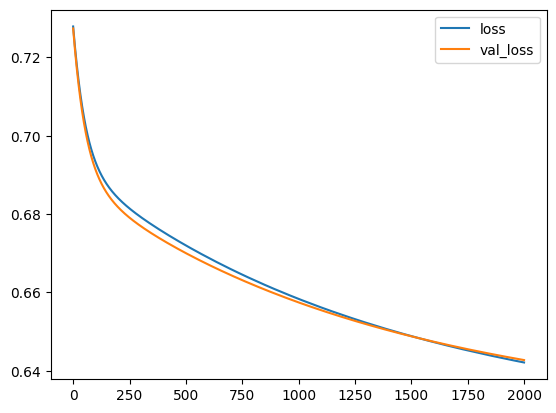

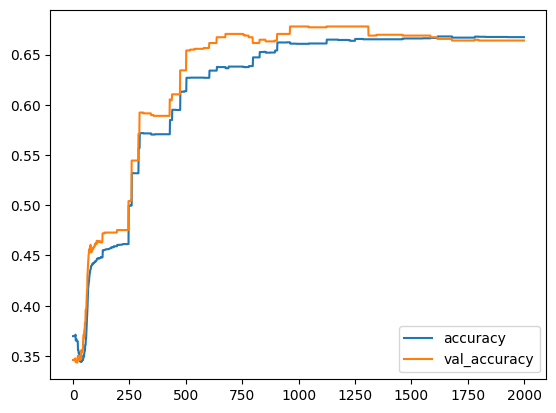

In [32]:
plt.figure()
plt.plot(history["loss"],label="loss")
plt.plot(history["val_loss"],label="val_loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(history["accuracy"],label="accuracy")
plt.plot(history["val_accuracy"],label="val_accuracy")
plt.legend()
plt.show()

In [34]:
print("final train accuracy:", history["accuracy"][-1])
print("final test accuracy:", history["val_accuracy"][-1])

final train accuracy: 0.6673333048820496
final test accuracy: 0.6639209389686584
